In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from experiment_mnist import *
from tfshow import *

Using TensorFlow backend.


In [2]:
methods = ['l1', 'l2', 'delta', 'dropout', 'none']
activations = ['sigmoid', 'relu']
layers = [1,2,3,4,5,6]
reg_coeff = np.logspace(-3,3,10)

### Sigmoid, 1 layer, 50 neurons, 0.2 dropout, K = 0.1

In [3]:
N = [50, 50]
P = 0.2
KLips = 0.1
epochs = 300
activation = 'sigmoid'

  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:28<00:00, 11.36it/s]


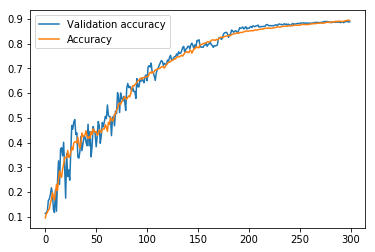

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


In [4]:
model_no_reg = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = 0,
                             reg_coeff = 0, do_print = True)

100%|██████████| 20/20 [00:01<00:00, 10.28it/s]


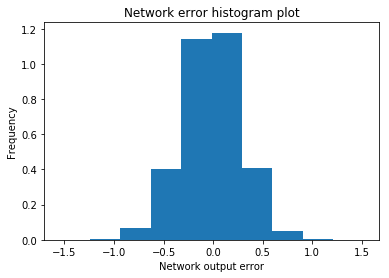

Error; maximal over inputs, average over dropout:
True values array mean: 0.102466 variance 0.240445
Experiment 0.361704 Std 0.260803
Equation   2.848315 Std 2.916473
Tightness  12.7% Std 8.9%


(0.36170435, 0.2608033, 2.8483149371561014, 2.9164728969757627, 0.24044484)

In [5]:
model_no_reg.run(inputs = 20, repetitions = 10000)

In [6]:
acc_no_reg = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm)
print(acc_no_reg)

100%|██████████| 1000/1000 [00:09<00:00, 101.31it/s]

0.473256


In [7]:
acc_no_reg_orig = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm, no_dropout = True)
print(acc_no_reg_orig)

100%|██████████| 1000/1000 [00:00<00:00, 3911.86it/s]

0.894


In [8]:
def plot_error(method = 'l1', coeffs = np.logspace(-10, 1, 30)):
    models = {}
    fail_accs = []
    orig_accs = []
    for coeff in coeffs:
        models[coeff] = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = method,
                                 reg_coeff = coeff, do_print = True)
        fail_accs += [models[coeff].get_accuracy(500, 500)]
        orig_accs += [models[coeff].get_accuracy(500, no_dropout = True)]
        K.clear_session()
    plt.figure()
    plt.title(method + ' and resilience')
    plt.xlabel('Regularization coefficient')
    plt.ylabel('Accuracy')
    plt.plot(coeffs, fail_accs, label = 'Dropout')
    plt.plot(coeffs, orig_accs, label = 'No dropout')
    plt.plot(coeffs, [acc_no_reg] * len(coeffs), label = 'No reg, dropout')
    plt.plot(coeffs, [acc_no_reg_orig] * len(coeffs), label = 'No reg, no dropout')
    plt.xscale('log')
    plt.legend()
    plt.show()

  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.08it/s]


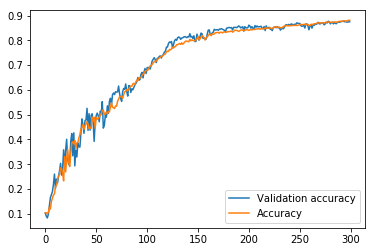

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.97it/s]


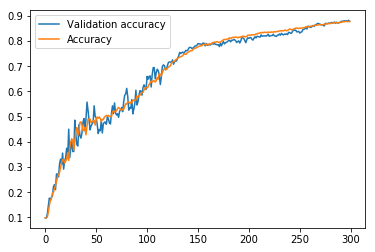

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.40it/s]


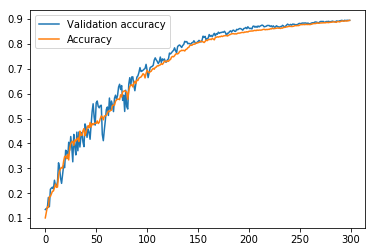

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.01it/s]


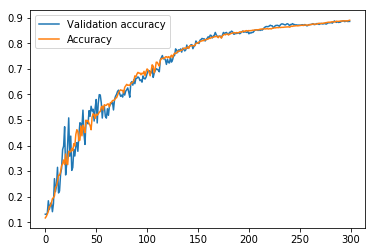

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.92it/s]


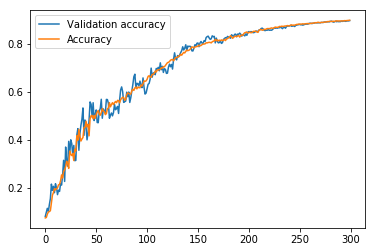

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.02it/s]


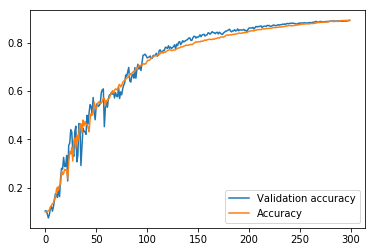

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.10it/s]


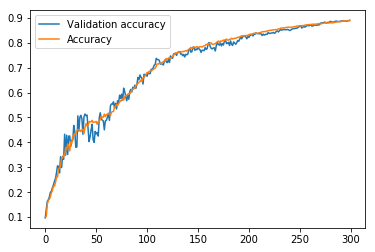

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.95it/s]


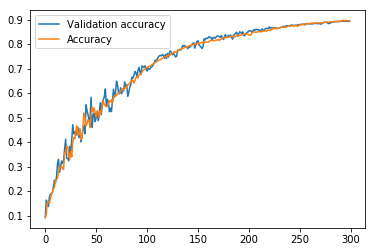

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.07it/s]


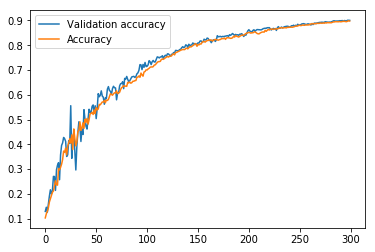

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.96it/s]


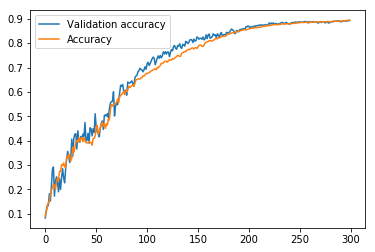

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.08it/s]


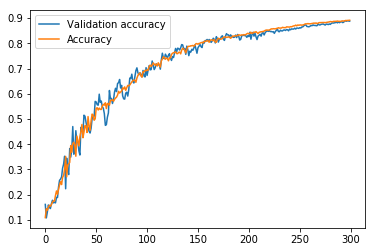

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.95it/s]


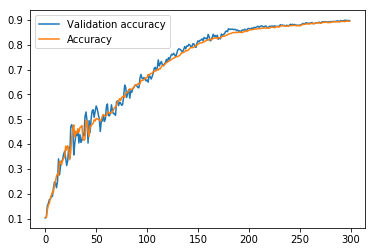

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.05it/s]


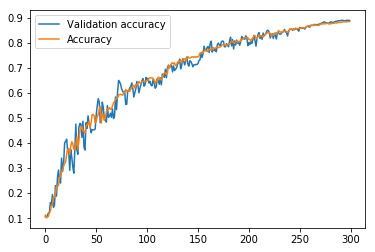

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.79it/s]


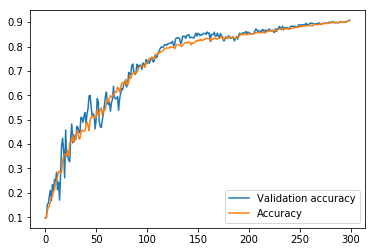

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.89it/s]


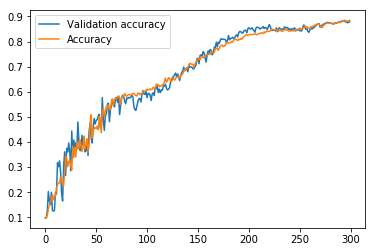

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.38it/s]


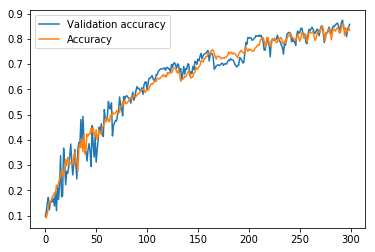

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.78it/s]


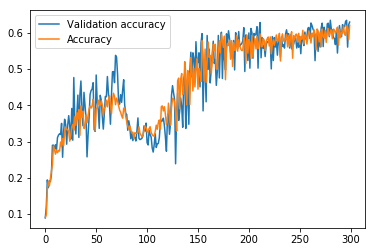

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.50it/s]


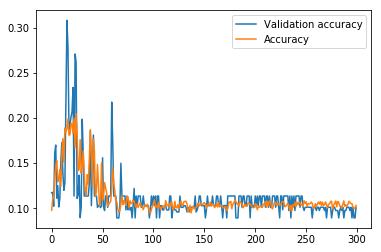

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.32it/s]


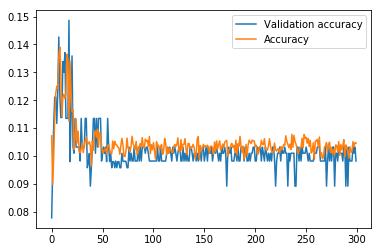

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.82it/s]


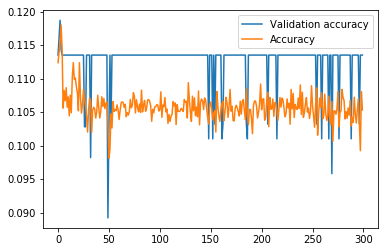

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.02it/s]


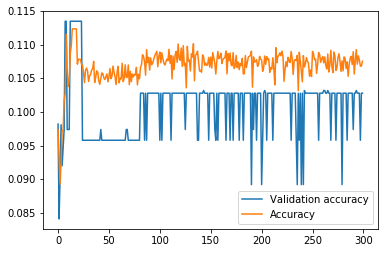

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.59it/s]


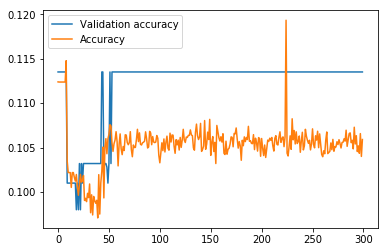

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.24it/s]


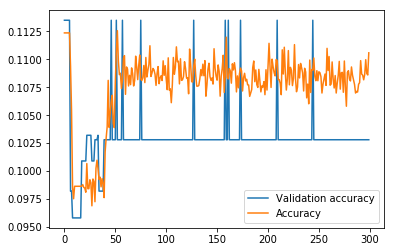

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.10it/s]


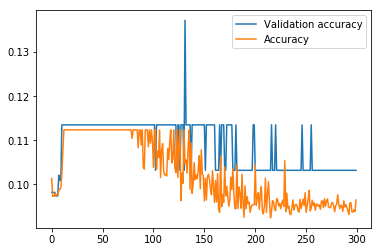

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.80it/s]


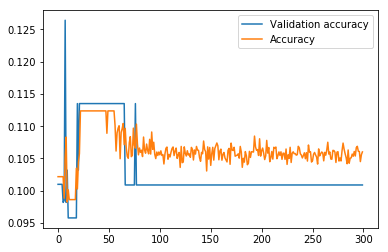

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.78it/s]


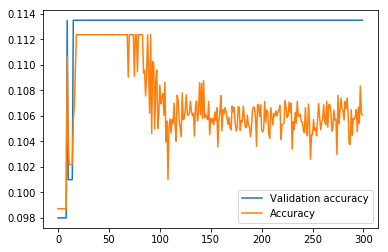

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.89it/s]


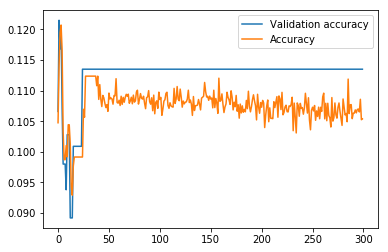

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.26it/s]


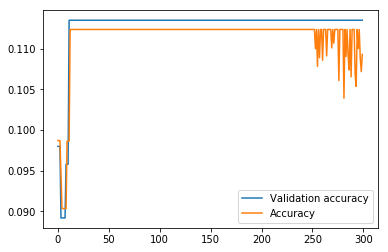

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.92it/s]


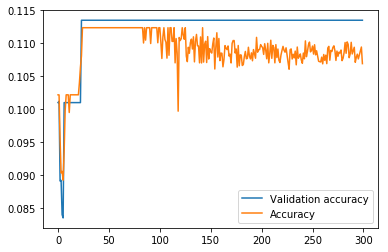

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.94it/s]


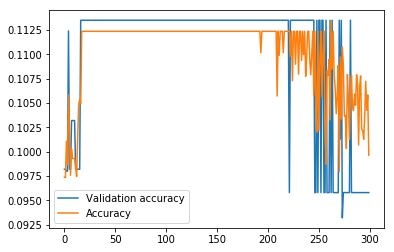

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


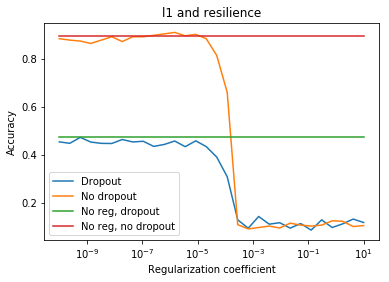

In [9]:
plot_error('l1')

  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.83it/s]


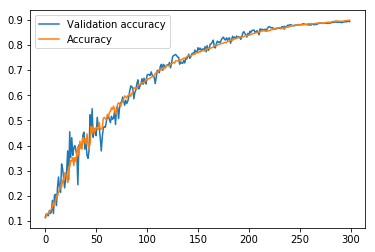

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.03it/s]


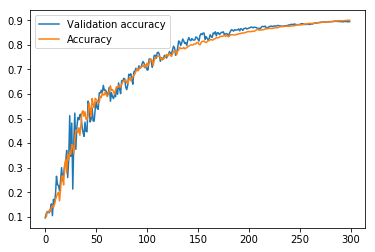

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.97it/s]


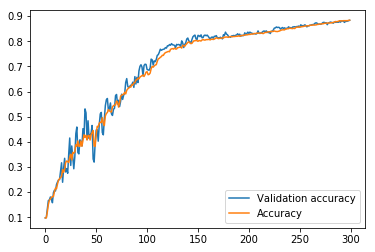

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.05it/s]


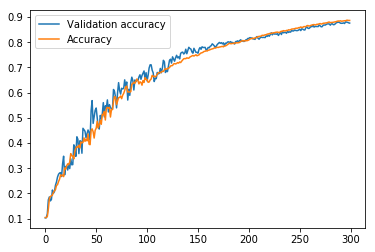

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.98it/s]


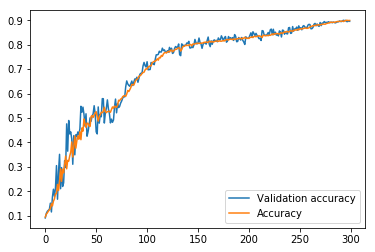

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.42it/s]


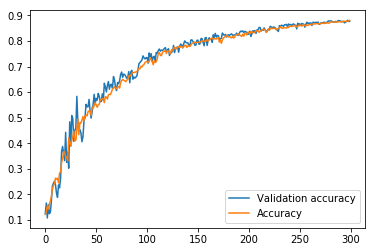

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.95it/s]


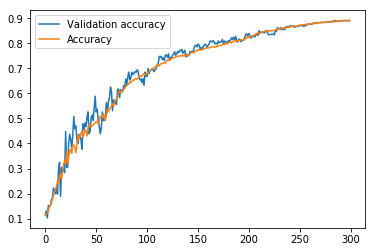

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.47it/s]


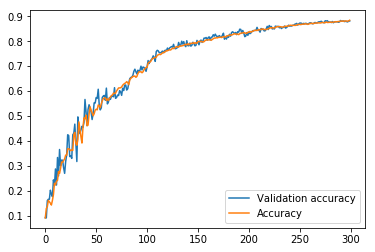

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.58it/s]


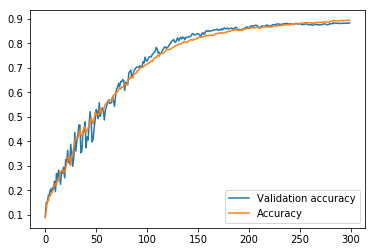

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.00it/s]


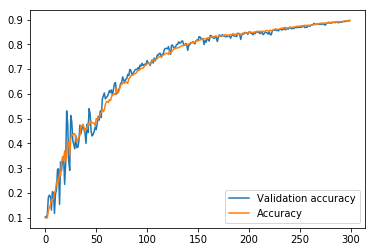

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.98it/s]


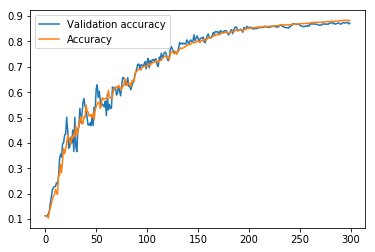

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.09it/s]


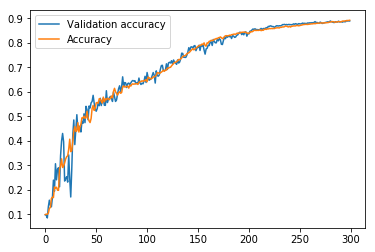

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.03it/s]


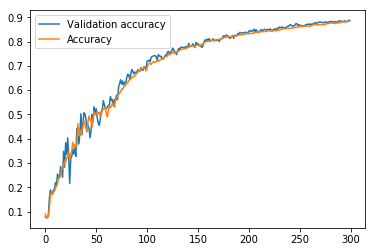

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.02it/s]


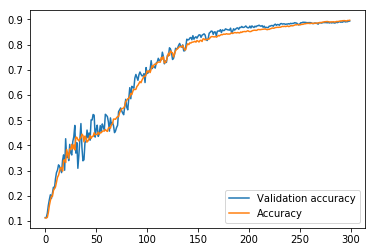

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.25it/s]


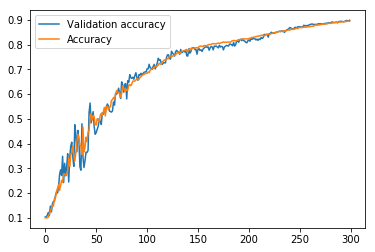

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.20it/s]


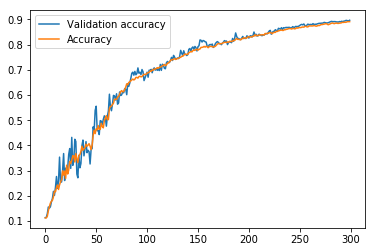

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.97it/s]


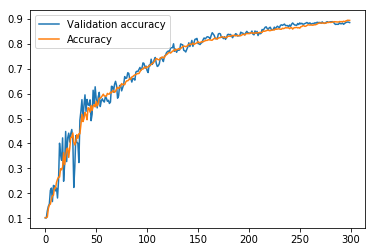

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.01it/s]


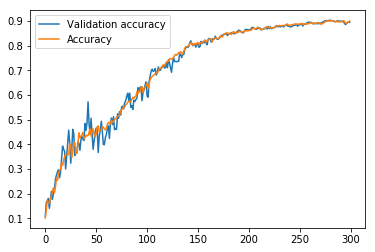

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.09it/s]


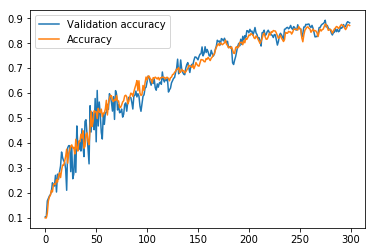

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.91it/s]


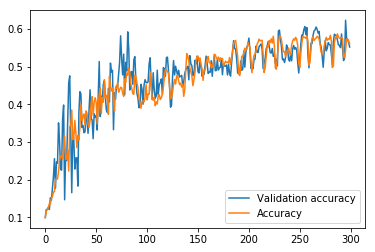

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.27it/s]


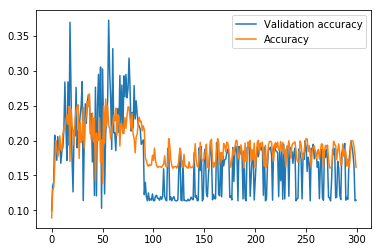

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.91it/s]


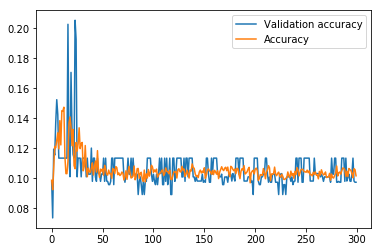

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.62it/s]


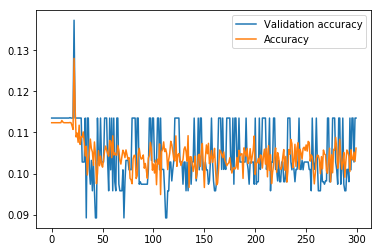

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.51it/s]


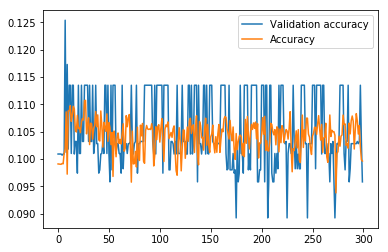

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.90it/s]


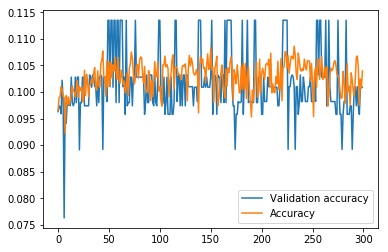

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.99it/s]


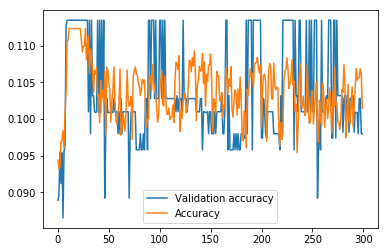

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.92it/s]


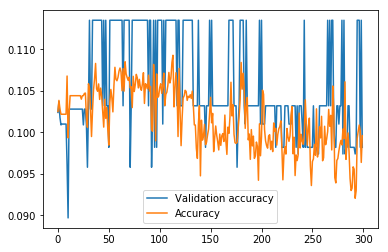

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.29it/s]


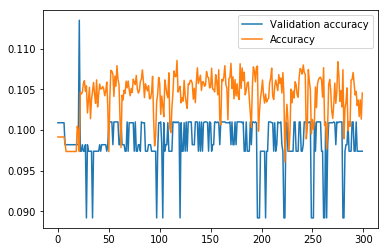

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.99it/s]


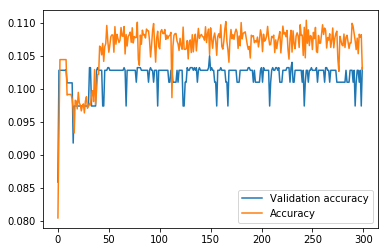

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.94it/s]


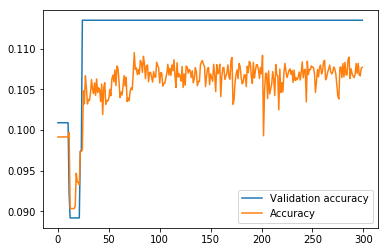

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


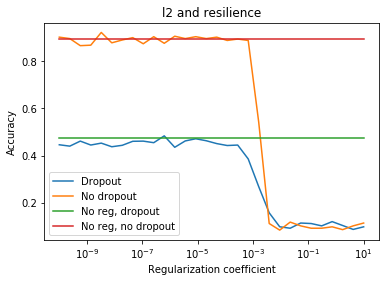

In [10]:
plot_error('l2')

  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.95it/s]


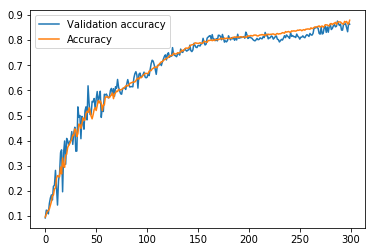

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.04it/s]


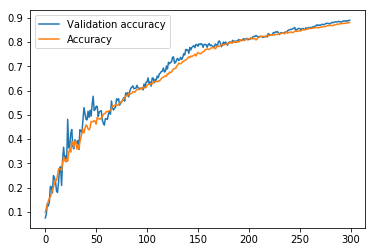

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.97it/s]


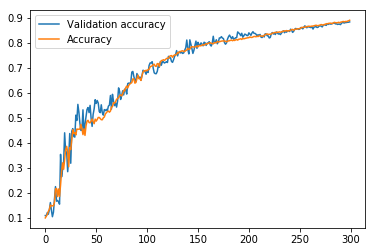

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.06it/s]


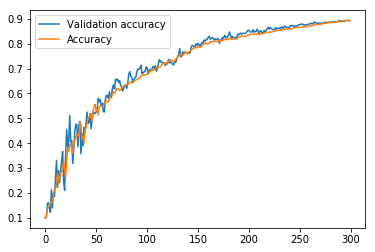

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.00it/s]


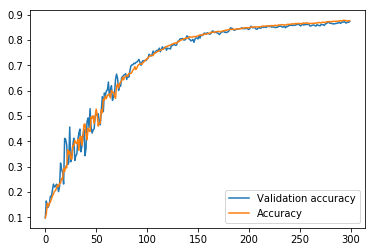

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.00it/s]


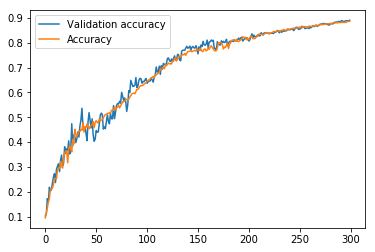

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.96it/s]


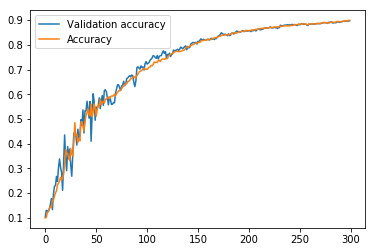

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.05it/s]


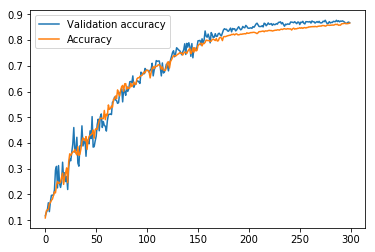

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.96it/s]


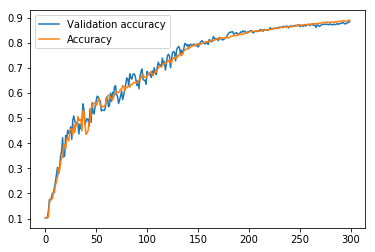

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.04it/s]


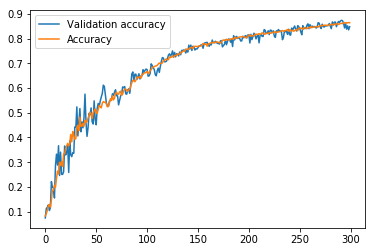

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.22it/s]


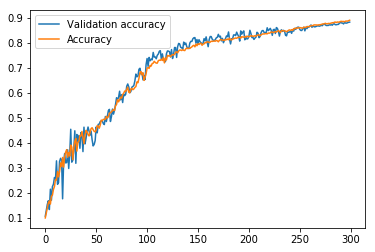

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.03it/s]


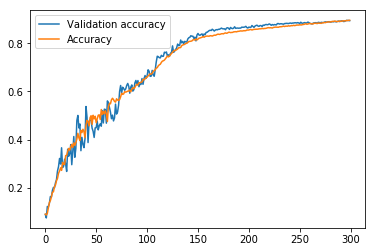

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.97it/s]


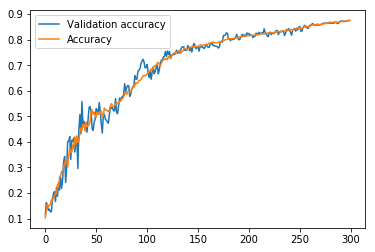

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.94it/s]


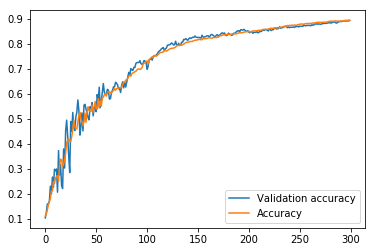

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.07it/s]


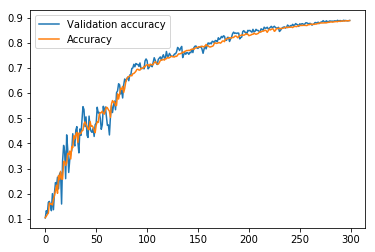

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.02it/s]


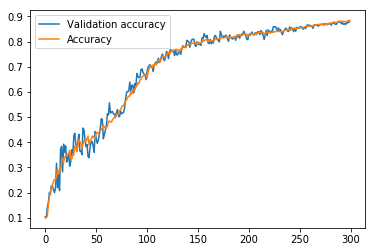

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.05it/s]


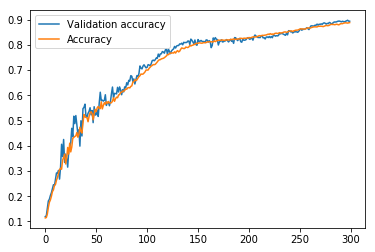

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.08it/s]


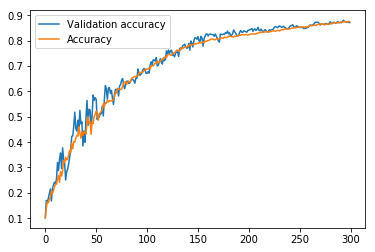

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.04it/s]


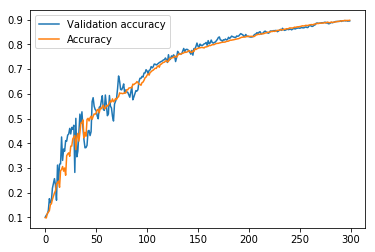

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.85it/s]


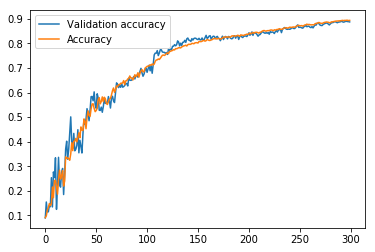

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.03it/s]


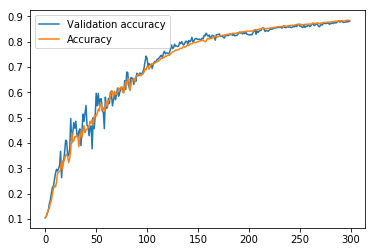

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.36it/s]


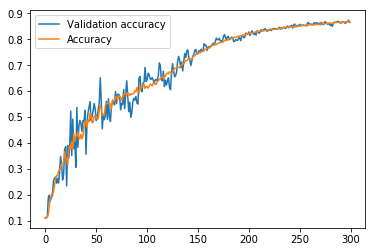

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.74it/s]


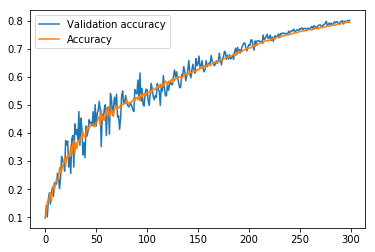

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.31it/s]


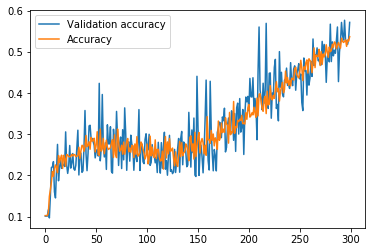

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.38it/s]


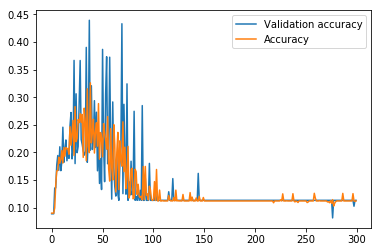

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.73it/s]


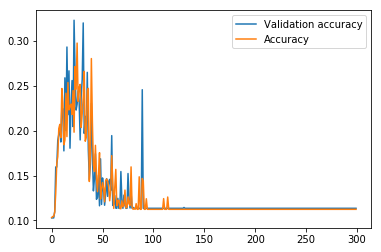

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 10.78it/s]


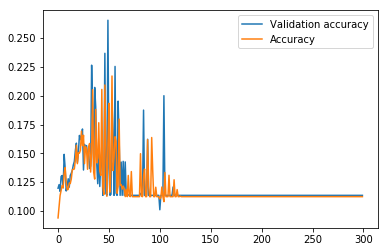

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.09it/s]


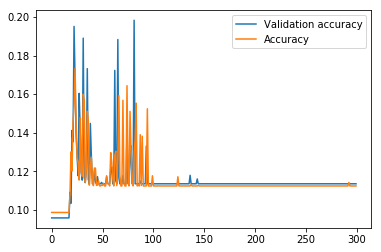

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.00it/s]


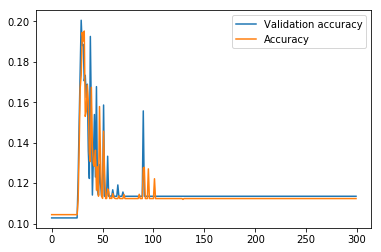

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


  0%|          | 0/300 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 300/300 [00:27<00:00, 11.47it/s]


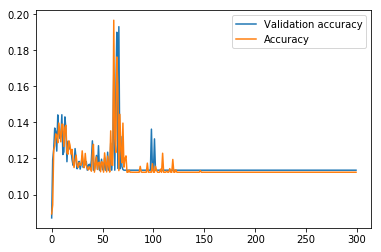

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers


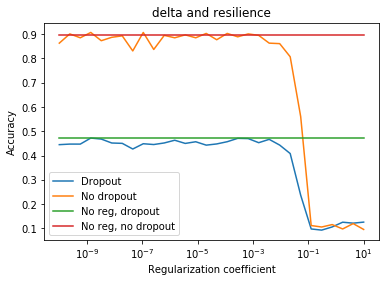

In [11]:
plot_error('delta')